In [2]:
#On commence par importer les bibliothèques qui nous seront utiles pour ce TP

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
%matplotlib notebook

Question 1 : 

On crée la chaîne de caractères filename 


In [3]:
#1)
filename = "HMMA238_TP_ibrahimgaizi.ipynb"


Question 2 : 

On crée la variable taille_str qui compte le nombre de caractères dans la chaîne 
de caractères filename.


In [4]:
#2)
taille_str = len(filename)

Question 3 : 


On crée une variable ma_graine qui vaut le reste de la division euclidienne 
de taille_str par 6

In [5]:
#3) 

ma_graine = taille_str % 6
print("Ma graine vaut {}.".format(ma_graine))

Ma graine vaut 5.


On effectue maintenant une implémentation sans numpy

In [6]:
#Implémentation sans numpy

def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
               N[x][y] = Z[x-1][y-1] + Z[x][y-1]+Z[x+1][y-1] + Z[x-1][y] + 0 +Z[x+1][y] + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
 
 
 
 
    return N 

 
 

Question 4 : 
    
   On applique maintenant notre programme à la liste de liste Z  

In [7]:
#4) 
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]



N = calcul_nb_voisins(Z)
print(N)

#N exprime les#nombre?# cellules voisines mortes ou vivantes; pour chaque cellule qu'on a, 
#à titre d'exemple, sur la matrice Z qu'on a, la cellule (2 , 2) a une cellule voisine 
#vivante et 7 mortes, pour la cellule (4 , 4) en a 2 vivantes et 6 mortes...




[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


In [8]:
# On définit la fonction iteration_jeu comme suit :

def iteration_jeu(Z):

    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z











La fonction a pour entrée une liste de liste constituée par des 0 et des 1,
les 0 corresspendent aux cellules mortes, et les 1 aux vivantes,
La fonction a pour sortie une irération du jeu.
Notre fonction va tout d'abord vérifier si la cellule est vivante ou non, puis va 
nous indiquer l'état de ses voisins, pour pouvoir déterminer l'état de chaque cellule 
à l'étape qui suit, par exemple si la cellule a deux voisins vivant elle garder son état..

Question 5 : 
    
    On affiche maintenat les étapes du jeu; pour la liste Z, entre 0 et 9 itérations

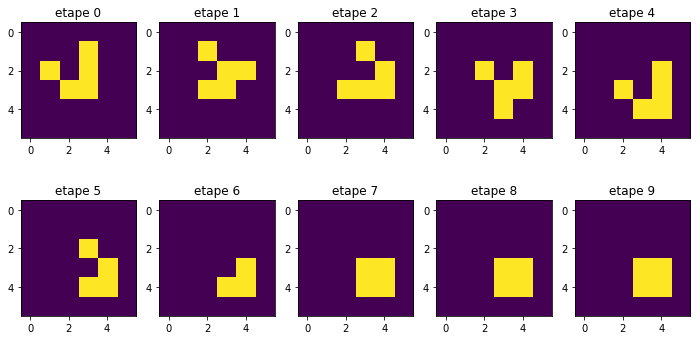

In [9]:
#5) 


Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

plt.figure(figsize=(12, 6))



Z = np.array(Z)

for i in range (1, 11):
    plt.subplot(2, 5, i) # la fonction subplot permet d'afficher sur 2 lignes et 5 colonnes
    plt.imshow(Z) # On affiche Z
    plt.title ('etape ' + str(i-1)) # On ajoute un titre étape i en dessus des images 
    Z = iteration_jeu(Z) # ça nous permet de charger les valeurs de l'itération qui suit 

Question 6:

 Entre l'itération 0 et 4 on a le même nombre de cellules vivantes(et donc de cellules
mortes aussi). Entre chacune de ces étapes et l'étape qui la suit, le nombre de cellule 
qui se crée correspend à celui des cellules qui meurent. Ce qui explique le mouvement 
de la grille.



à Partir de l'étape 7, chacune des cellules vivantes  a exactement 2 voisins vivants, 
donc aucunes des cellules vivantes ne va mourir, et pour les cellules mortes, aucune 
 d'entres elles n'a 3 voisins vivants, donc aucune cellule morte ne va se transformer 
 en cellule vivante. Ce qui explique l'état stationaire qu'on a à partir de cette étape. 



Question 7 : On effectue une Implementation avec Numpy

In [10]:
#7) 

#On définit le vecteur vec comme suit :
vect = np.array([0, 1, 0, 0, 1, 1])# Array de taille (1,6)
nb_vect = np.zeros(vect.shape)# on initialise pour avoir la même taille pour vecteur nb_vect
#                   vect, les cases vides vont être remplit automatiquement avec des 0
nb_vect[1:-1] += (vect[:-2] + vect[2:])
nb_vect

#Le vecteur nb_vect correspond aux nombres de voisins que chaque élément du vecteur vect a.


array([0., 0., 1., 1., 1., 0.])

Question 8 :

On crée maintenant une fonction calcul_nb_voisins_np, on l'applique  sur des array,
qui prend en entrée une matrice Z et qui ressort le nombre de voisins pour chaque entrée 
(et qui vaut zéro sur le pourtour). 
On utilisera donc 8 types de slicing pour obtenir le nombre de voisins.

In [11]:
#8)



def calcul_nb_voisins_np(X):
    

    
    X = np.array(X)
    nb_voisins_np = np.zeros(X.shape) 
    nb_voisins_np[1:-1, 1:-1] = X[1:-1, :-2] + \
    X[1:-1, 2:] + X[:-2, 1:-1] + X[2:, 1:-1]+ \
    X[:-2, :-2] + X[:-2, 2:] + X[2:, 2:] + X[2:, :-2]
    return(nb_voisins_np)

Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

calcul_nb_voisins_np(Z)



array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 3., 1., 2., 0.],
       [0., 1., 5., 3., 3., 0.],
       [0., 2., 3., 2., 2., 0.],
       [0., 1., 2., 2., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

Question 9 :

On crée une fonction iteration_jeu_np, similaire à iteration_jeu mais qui prend comme entrée 
sortie des numpy array et non plus des listes de listes.

In [12]:
# 9)

def iteration_jeu_np(Z): 
    

    
    forme = len(Z), len(Z[0]) 
    Z = np.array(Z) # la modification qu'on va avoir est d'utiliser des array 
    #                 et non des listes de listes
    N = calcul_nb_voisins_np(Z) # On travaille avec calcul_nb_voisins_np(Z) 
    #                             et non calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1): # le reste du code est le même que pour calcul_nb_voisins
        for y in range(1, forme[1]-1): 
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3): 
                Z[x][y] = 0 
            elif Z[x][y] == 0 and N[x][y] == 3: 
                Z[x][y] = 1 
    return Z

Question 10 : 
    
  On crée une fonction jeu_np qui prend en entrée une matrice initiale Z_in et un nombre
d'itérations nb_iter et sort une matrice (de même taille que Z_in) décrivant l'état du jeu 
de la vie après nb_iter itérations.   
    

In [49]:
#10) 


def jeu_np(Z_in, nb_iter):
   
    for j in range(1, nb_iter+1):
        Z_in = iteration_jeu_np(Z_in)
    return(Z_in)




Question 11 : 

On affiche maintenant un film avec la commande animation.FuncAnimation de matplotlib qui représente les itérations du jeu de la vie quand on initialise avec 
la matrice Z_huge :

In [14]:


#On définit d'abord notre matrice Z_huge: 

Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np
Z_huge
 
 
 
 
 



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
fig = plt.figure()
im = plt.imshow(Z_huge) # on obsèrve la matrice initial


def animate(i):
    jeu_np(Z_huge, 1)
    im = plt.imshow(Z_huge)
    return im,


plt.title("Le jeu de la vie initialisé avec Z_huge")
plt.colorbar()
anim = animation.FuncAnimation(fig, animate, 9, interval=10, blit=True) 
plt.show()

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 2 Axes>

Les cellules jaunes sont les cellules vivantes 

Question 12

On Reprend la question précédente en l'initialisant avec une matrice aléatoire de taille 
100ˆ100, remplie de 1 et de 0, et dont la proportion de 1 est 
        (en espérance) égale à (1 + ma_graine) * 10 / 100  
 

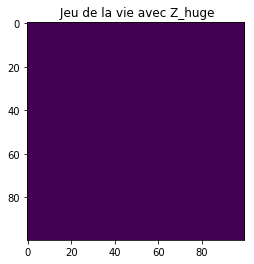

In [21]:
Z_huge = np.zeros((100, 100))
Z = np.random.binomial(1, (1 + ma_graine) * 10 / 100, size=(98, 98))
Z_huge[1:np.shape(Z_huge)[1]-1, 1:np.shape(Z_huge)[0]-1] = Z
fig = plt.figure()
shw = plt.imshow(Z_huge)

def animate(i):
    jeu_np(Z_huge, 1)
    shw = plt.imshow(Z_huge)
    return shw,
plt.title(" Jeu de la vie avec Z_huge")
anim = FuncAnimation(fig, animate)
plt.show()

Question 13 : 


  On propose et affiche avec plt.imshow() des matrices de taille 50 ˆ 50 
tels que trois représentent des jeux qui sont fixes dans le temps et une qui représente 
un jeu dont l'état oscille avec une période de deux
    



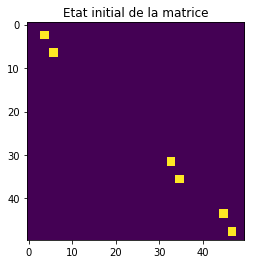

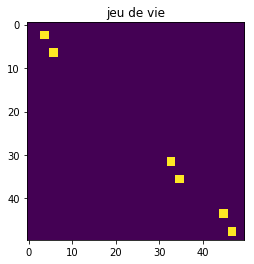

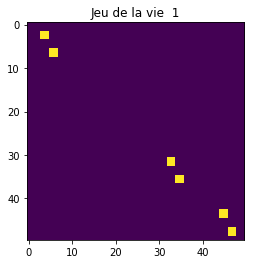

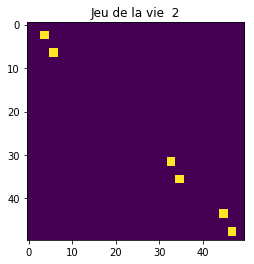

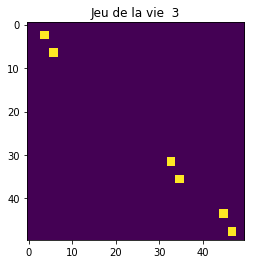

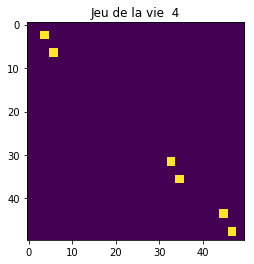

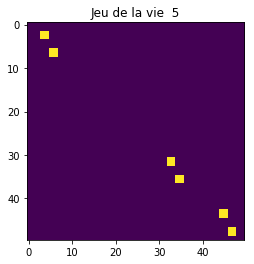

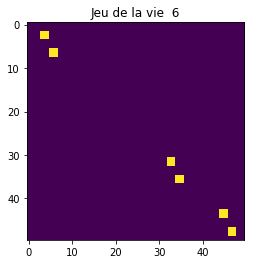

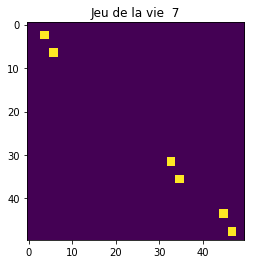

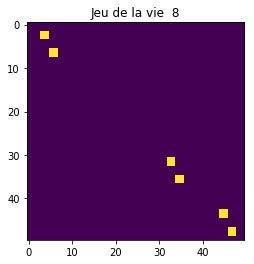

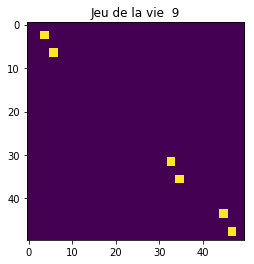

In [30]:
#13) 
#On commence par définir 3 matrices de jeu qui restent stables au cours du temps, pour cela
#on s'arrange pour mêttre deux cellules vivantes voisines à chaque cellule vivante, comme 
#ça, cette dernière reste en vie, et on vérifie que aucune cellule morte n'a 3 voisines
#vivantes


Z_huge = np.zeros((50, 50))  # Première matrice
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 1],
     [0, 0, 0, 0, 1, 1]])
Z_huge[1:8, 1:7] = Z_np
Z_huge[30:37, 30:36] = Z_np
Z_huge[42:49, 42:48] = Z_np


def imshow_jeu_de_la_vie(Z):
    fig, ax = plt.subplots()
    # On commence par afficher l'état initial de la matrice:
    plt.imshow(np.array(Z))
    plt.title("Etat initial de la matrice")


imshow_jeu_de_la_vie(Z_huge)


def Jeudevie(Z):

    fig, ax = plt.subplots()
    plt.imshow(np.array(Z))
    plt.title("jeu de vie")
    for i in range(1, 10):
        fig, ax = plt.subplots()
        iteration_jeu_np(Z)
        A = np.array(Z)
        plt.imshow(A)
        plt.title("Jeu de la vie  " 
                  + str(i))
        plt.show()


Jeudevie(Z_huge)

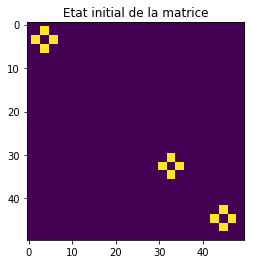

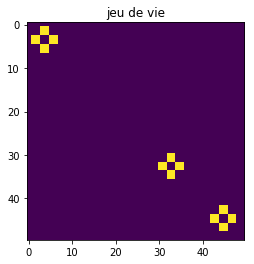

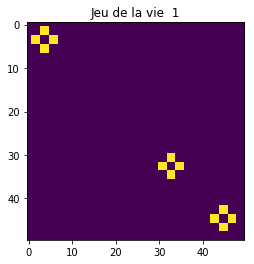

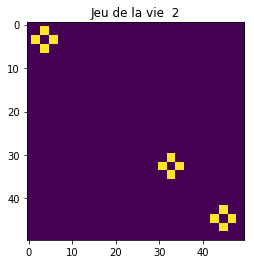

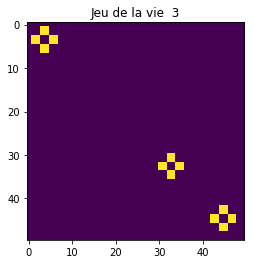

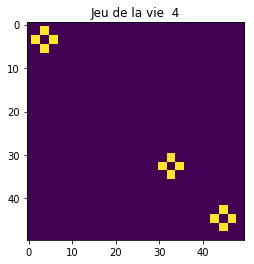

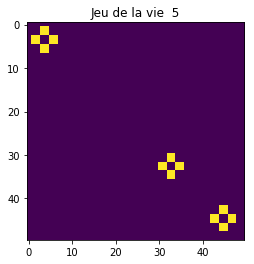

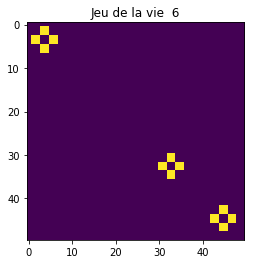

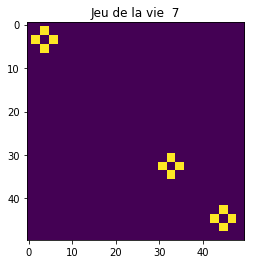

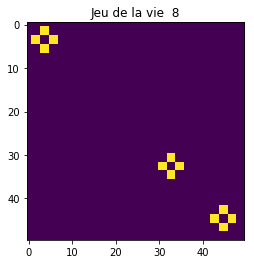

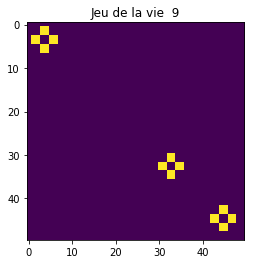

In [31]:
Z_huge = np.zeros((50, 50)) # Deuxième matrice
Z_np = np.array(
    [[0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [1, 1, 0, 0, 1, 1],
     [1, 1, 0, 0, 1, 1],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0]])
Z_huge[1:7, 1:7] = Z_np
Z_huge[30:36, 30:36] = Z_np
Z_huge[42:48, 42:48] = Z_np

imshow_jeu_de_la_vie(Z_huge)

def Jeudevie(Z):

    fig, ax = plt.subplots()
    plt.imshow(np.array(Z))
    plt.title("jeu de vie")
    for i in range(1, 10):
        fig, ax = plt.subplots()
        iteration_jeu_np(Z)
        A = np.array(Z)
        plt.imshow(A)
        plt.title("Jeu de la vie  " 
                  + str(i))
        plt.show()


Jeudevie(Z_huge)

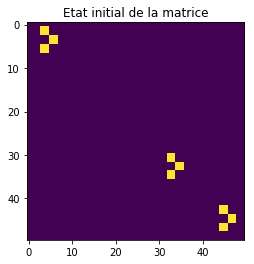

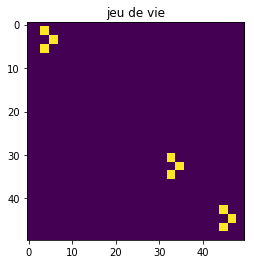

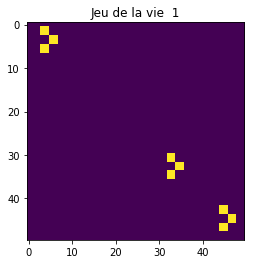

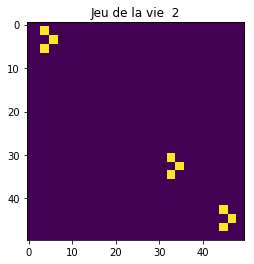

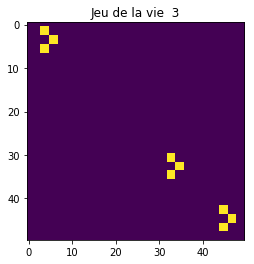

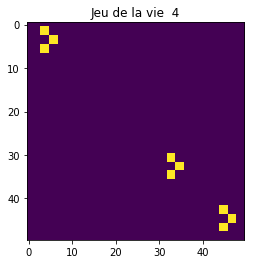

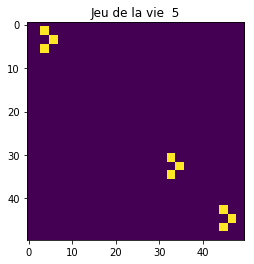

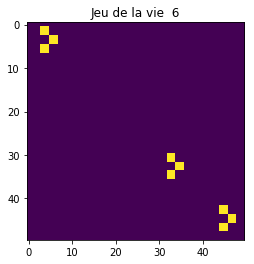

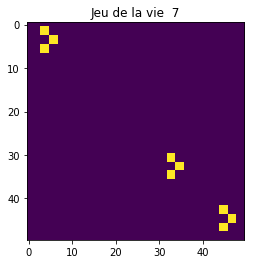

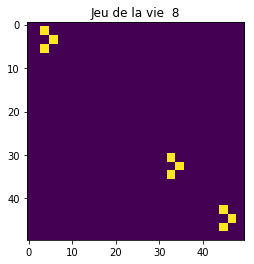

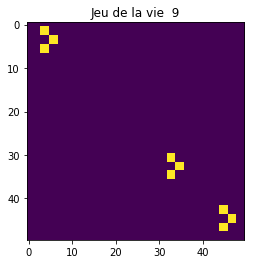

In [32]:
Z_huge = np.zeros((50, 50)) # troisième matrice
Z_np = np.array(
    [[0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 1, 1],
     [0, 0, 0, 0, 1, 1],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0]])
Z_huge[1:7, 1:7] = Z_np
Z_huge[30:36, 30:36] = Z_np
Z_huge[42:48, 42:48] = Z_np

imshow_jeu_de_la_vie(Z_huge)
def Jeudevie(Z):

    fig, ax = plt.subplots()
    plt.imshow(np.array(Z))
    plt.title("jeu de vie")
    for i in range(1, 10):
        fig, ax = plt.subplots()
        iteration_jeu_np(Z)
        A = np.array(Z)
        plt.imshow(A)
        plt.title("Jeu de la vie  " 
                  + str(i))
        plt.show()


Jeudevie(Z_huge)

In [ ]:
on peut prendre des matrices composées de batonets: des vecteurs à 3 cellules vivantes 
collées les unes aux autres(00..011100), car après chaque itération, deux cellules vont mourir 
et deux autres vont naitre.

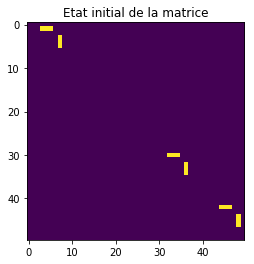

In [46]:
# Pour la matrice de jeu 2-périodique, on prend : 


Z_huge = np.zeros((50, 50))
Z_np = np.array(
    [[0, 0, 1, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0]])
Z_huge[1:9, 1:9] = Z_np
Z_huge[30:38, 30:38] = Z_np
Z_huge[42:50, 42:50] = Z_np

imshow_jeu_de_la_vie(Z_huge)

<IPython.core.display.Javascript object>


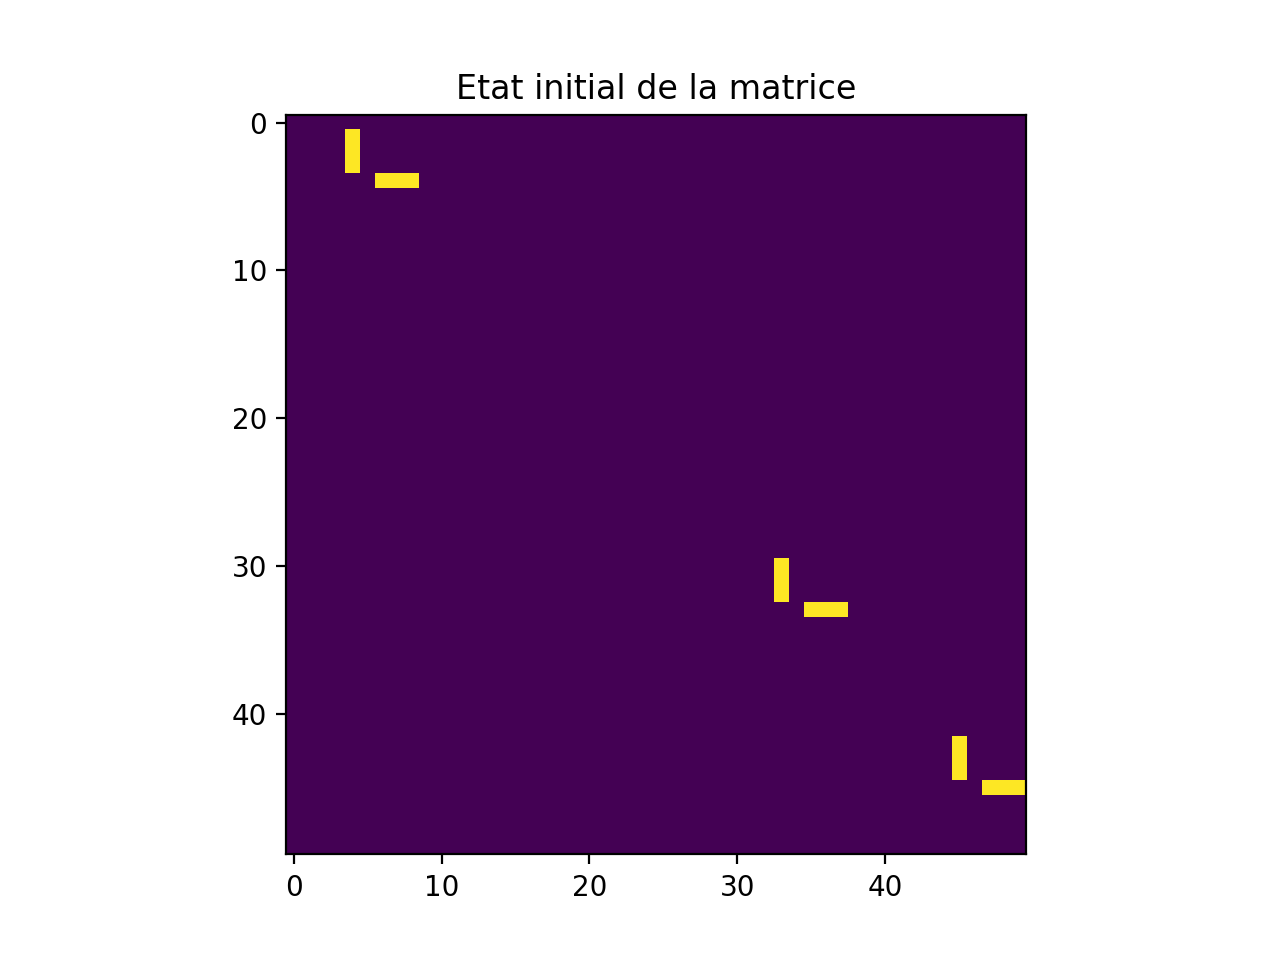

In [56]:
#à la deuxième itération on obtient :

Z_huge = np.zeros((50, 50))
Z_np = np.array(
    [[0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 1, 1],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0]])
Z_huge[1:9, 1:9] = Z_np
Z_huge[30:38, 30:38] = Z_np
Z_huge[42:50, 42:50] = Z_np

imshow_jeu_de_la_vie(Z_huge)



<IPython.core.display.Javascript object>


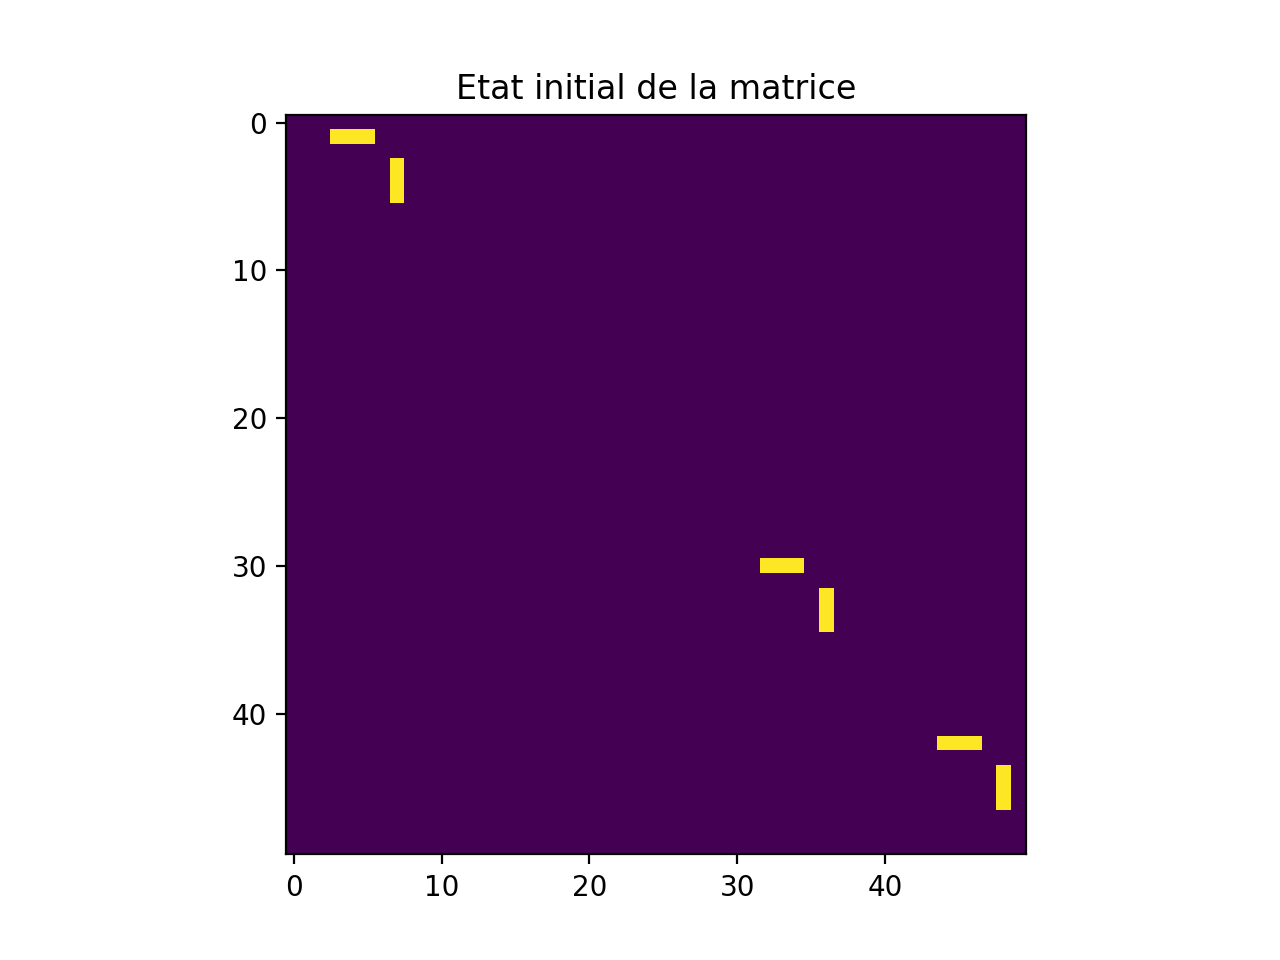

In [59]:
# Pour la matrice de jeu 2-périodique, on prend : 


Z_huge = np.zeros((50, 50))
Z_np = np.array(
    [[0, 0, 1, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0]])
Z_huge[1:9, 1:9] = Z_np
Z_huge[30:38, 30:38] = Z_np
Z_huge[42:50, 42:50] = Z_np

imshow_jeu_de_la_vie(Z_huge)


Question 14 : 

On reprend la formulation précédente avec numpy et on crée le jeu sous forme d'une classe
JeuDeLaVie. 


In [62]:
    def __init__(self, init_state, _time_T):
        self.init_state = init_state # on commence par initialiser self
        self.n_1 = init_state.shape[0] # self 1 et self 2 correspondent aux dimension 
        self.n_2 = init_state.shape[1]# de la matrice init_state
        self._historic_state = np.ndarray((self.n_1, self.n_2, _time_T+1))# on crée un tenseur
        self._historic_state[:, :, 0] = self.init_state # Tridimensionne
    def play(self):
        t = 1
        while(t <= self._time_T):
            self._historic_state[:, :, t-1] = \
                iteration_jeu_np(self._historic_state[:, :, t])
            self.average_life = np.mean(self._historic_state, axis=(2))
            t = t + 1

    def __plot__(self, init_state, _time_T):
        self.average_life = 1/_time_T*self.average_life
        fig, ax = plt.subplots()
        plt.imshow(self.average_life)
        fig.suptitle("moyenne des vie des cellules")
        plt.show()

